In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
norm = lambda x: (x - np.mean(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))
y_data = data.pop("quality")
data = pd.DataFrame(norm(np.array(data)), columns=data.columns)
x_data = data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, shuffle=True)
print(y_train)

766    5
128    7
614    6
735    5
515    5
      ..
187    5
331    6
898    7
242    6
873    7
Name: quality, Length: 1071, dtype: int64


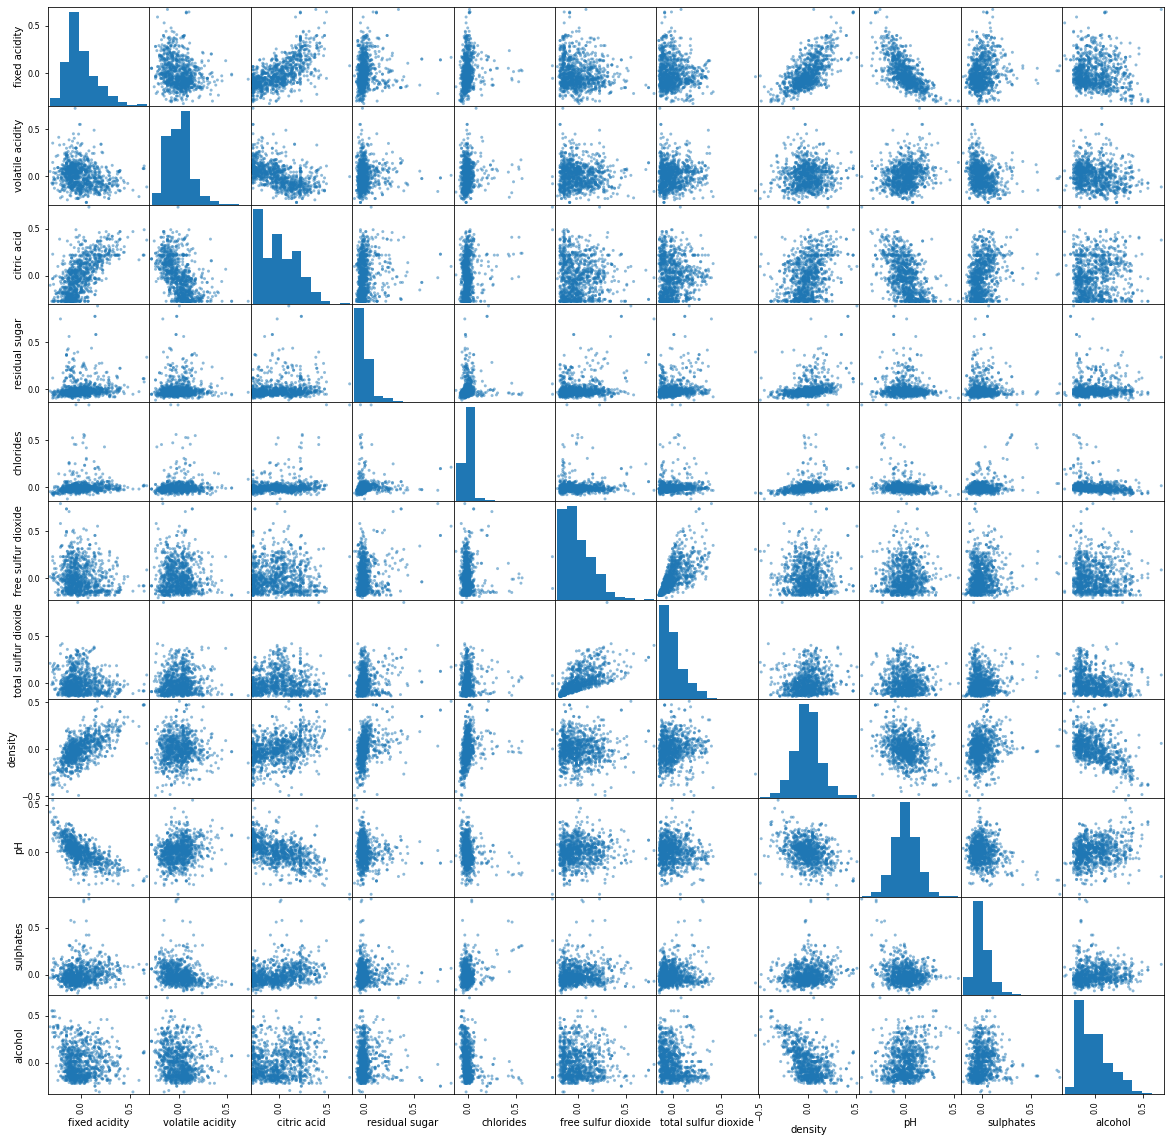

In [4]:
pd.plotting.scatter_matrix(x_train, figsize=[20, 20]);

In [5]:
class LinearRegression:
    def prediction(self, x):
        return np.dot(x, self.w) + self.b
    def step(self, x, y):
        error = self.prediction(x) - y
        gradient_w = self.w - self.lr * (np.mean(np.expand_dims(error, axis=1) * x, axis=0))
        gradient_b = self.b - self.lr * (np.mean(error))
        self.w = gradient_w
        self.b = gradient_b
    def cost(self, x, y):
        return (np.sum(self.prediction(x) - y)**2) / (2 * x.shape[0])
    def fit(self, x, y, lr, n_iter, x_test, y_test):
        self.w = np.ones(x.shape[1])
        self.b = 0
        self.lr = lr
        mse_history_train = list()
        mse_history_test = list()
        for i in range(n_iter):
            self.step(x, y)
            print(f"{i + 1} train iteration: error = {self.cost(x, y)}")
            print(f"{i + 1} test iteration: error = {self.cost(x_test, y_test)}")
            mse_history_train.append(self.cost(x, y))
            mse_history_test.append(self.cost(x_test, y_test))
        return mse_history_train, mse_history_test, self.w, self.b
    

In [6]:
n_iter = 1000
lr = 0.01
lin = LinearRegression()
mse_history_train, mse_history_test, w, b = lin.fit(x_train, y_train, lr, n_iter, x_test, y_test)

1 train iteration: error = 16582.31518937195
1 test iteration: error = 8309.939162136394
2 train iteration: error = 16252.247605458882
2 test iteration: error = 8145.992616533612
3 train iteration: error = 15928.75005457481
3 test iteration: error = 7985.294802929428
4 train iteration: error = 15611.691758470284
4 test iteration: error = 7827.781202369586
5 train iteration: error = 15300.94454208072
5 test iteration: error = 7673.388578677969
6 train iteration: error = 14996.382781709091
6 test iteration: error = 7522.054952937506
7 train iteration: error = 14697.883354240008
7 test iteration: error = 7373.719578478849
8 train iteration: error = 14405.325587364709
8 test iteration: error = 7228.3229163668175
9 train iteration: error = 14118.591210796894
9 test iteration: error = 7085.806611374608
10 train iteration: error = 13837.564308459552
10 test iteration: error = 6946.113468436102
11 train iteration: error = 13562.131271623577
11 test iteration: error = 6809.187429566767
12 train

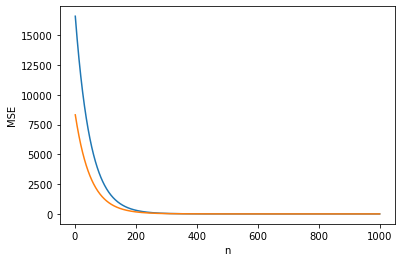

In [7]:
fig, ax = plt.subplots()
ax.plot([i for i in range(1, n_iter + 1)], mse_history_train)
ax.plot([i for i in range(1, n_iter + 1)], mse_history_test)
plt.ylabel('MSE')
plt.xlabel('n')
plt.show()

In [8]:
def get_prediction(x, w, b):
    return np.dot(x, w) + b
def get_cost(x, w, b, y):
    return (np.sum(get_prediction(x, w, b) - y)**2) / (2 * x.shape[0])
pred = np.around(get_prediction(x_test, w, b))
error = np.array(np.where((pred - y_test) == 0)).shape[1] / np.array(y_test).shape[0]
print(np.array(np.where((pred - y_test) == 0)))
cost = get_cost(x_test, w, b, y_test)
print(f"mse = {cost}, true = {error}")
table = pd.DataFrame({"Pred": pred, "True": y_test})
table.to_csv("pred.csv")


[[  0   2   3   7   8  10  11  12  15  19  23  29  31  32  34  35  36  37
   40  41  44  50  51  52  53  57  58  59  60  62  63  65  67  69  72  73
   75  78  79  80  81  84  85  86  88  89  90  93  96  97  98 100 103 105
  107 112 114 115 121 122 124 125 132 133 135 138 142 144 148 149 154 158
  159 163 165 166 167 168 169 170 171 172 173 174 175 176 178 181 182 183
  184 186 190 192 194 196 197 199 200 202 203 205 208 210 211 212 214 217
  218 219 222 226 228 230 231 235 244 248 249 255 256 258 259 262 263 266
  269 272 273 274 278 279 281 283 290 291 293 294 295 299 300 302 304 305
  307 309 312 319 320 322 323 333 335 336 338 339 342 343 346 347 348 350
  351 353 356 357 358 359 360 361 363 366 373 375 379 380 382 384 385 386
  387 391 392 395 397 399 403 405 413 414 415 419 420 421 423 424 425 426
  428 429 430 432 435 436 437 443 445 449 451 453 455 457 460 461 465 468
  471 474 476 478 479 480 481 482 484 486 487 489 492 493 496 497 502 503
  504 508 509 513 515 516 517 518 519 